In [17]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [18]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split as time_train_test_split

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df=pd.read_excel('/content/drive/MyDrive/Data_Pal.xlsx')
#df.set_index('Date', inplace = True)
df.head(5)

,Ecole,Date,Code_District,Code_Centre,Code_Option,Num_Ecole_Centre,Code_gestion_Etabli,Participants,Participans_Fille_total,Participants_Garcon,Total_Reussite,Reussite_Fille,Reussite_Garcon,Unnamed: 13,Unnamed: 14
0,2735.0,2019-07-16,11,1,101.0,1.0,7.0,5.0,2.0,3,2.0,1.0,1,NaN,NaN
1,1707.0,2019-07-16,11,1,101.0,2.0,7.0,25.0,15.0,10,21.0,12.0,9,NaN,NaN
2,944.0,2019-07-16,11,1,101.0,3.0,2.0,49.0,26.0,23,49.0,26.0,23,NaN,NaN
3,1654.0,2019-07-16,11,1,101.0,4.0,7.0,54.0,29.0,25,54.0,29.0,25,NaN,NaN
4,2668.0,2019-07-16,11,1,101.0,5.0,7.0,13.0,8.0,5,9.0,4.0,5,NaN,NaN


In [22]:
data_drop1= data= df.drop(['Unnamed: 13','Unnamed: 14'], axis=1)
#data= df.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16'], axis=1)
data_drop1.head(5)

,Ecole,Date,Code_District,Code_Centre,Code_Option,Num_Ecole_Centre,Code_gestion_Etabli,Participants,Participans_Fille_total,Participants_Garcon,Total_Reussite,Reussite_Fille,Reussite_Garcon
0,2735.0,2019-07-16,11,1,101.0,1.0,7.0,5.0,2.0,3,2.0,1.0,1
1,1707.0,2019-07-16,11,1,101.0,2.0,7.0,25.0,15.0,10,21.0,12.0,9
2,944.0,2019-07-16,11,1,101.0,3.0,2.0,49.0,26.0,23,49.0,26.0,23
3,1654.0,2019-07-16,11,1,101.0,4.0,7.0,54.0,29.0,25,54.0,29.0,25
4,2668.0,2019-07-16,11,1,101.0,5.0,7.0,13.0,8.0,5,9.0,4.0,5


In [23]:
data_drop1.rename(columns={'Date':'ds','Participants':'y'}, inplace=True)
data_drop1.head()

,Ecole,ds,Code_District,Code_Centre,Code_Option,Num_Ecole_Centre,Code_gestion_Etabli,y,Participans_Fille_total,Participants_Garcon,Total_Reussite,Reussite_Fille,Reussite_Garcon
0,2735.0,2019-07-16,11,1,101.0,1.0,7.0,5.0,2.0,3,2.0,1.0,1
1,1707.0,2019-07-16,11,1,101.0,2.0,7.0,25.0,15.0,10,21.0,12.0,9
2,944.0,2019-07-16,11,1,101.0,3.0,2.0,49.0,26.0,23,49.0,26.0,23
3,1654.0,2019-07-16,11,1,101.0,4.0,7.0,54.0,29.0,25,54.0,29.0,25
4,2668.0,2019-07-16,11,1,101.0,5.0,7.0,13.0,8.0,5,9.0,4.0,5


In [24]:
data_drop2= data_drop1.drop(['Ecole','Code_District','Code_Centre','Code_Option','Num_Ecole_Centre','Code_gestion_Etabli','Participans_Fille_total','Participants_Garcon','Total_Reussite','Reussite_Fille','Reussite_Garcon'], axis=1)
data_drop2.head(5)

,ds,y
0,2019-07-16,5.0
1,2019-07-16,25.0
2,2019-07-16,49.0
3,2019-07-16,54.0
4,2019-07-16,13.0


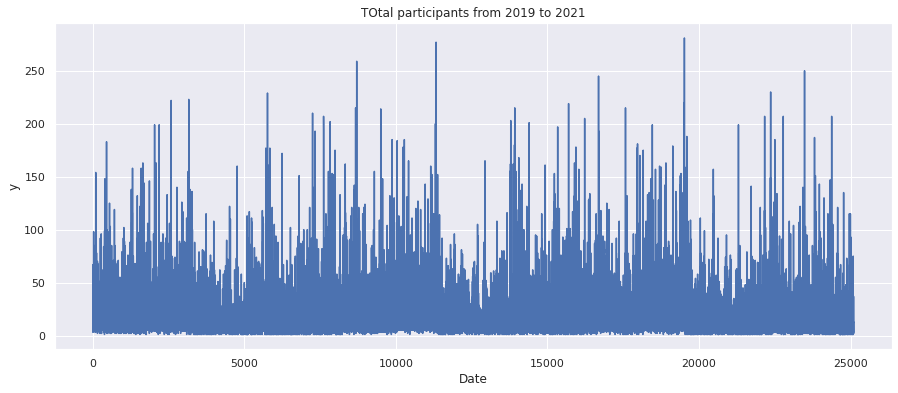

In [25]:
data_drop2["y"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("y")
plt.title("TOtal participants from 2019 to 2021")
plt.show()


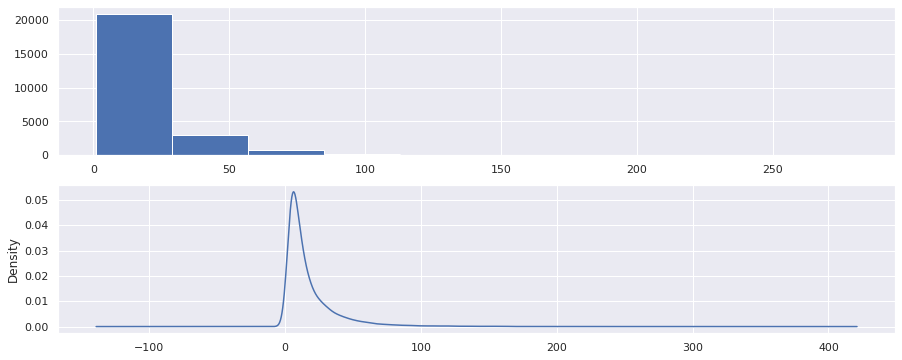

In [26]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
data_drop2["y"].hist()
plt.subplot(212)
data_drop2["y"].plot(kind='kde')
plt.show()

In [27]:
def mean_absolute_percentage_error_func(y_true, y_pred):
    '''
    Calculate the mean absolute percentage error as a metric for evaluation
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        Mean absolute percentage error 
    '''    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error_func(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [29]:
def Augmented_Dickey_Fuller_Test_func(timeseries , column_name):
    '''
    Calculates statistical values whether the available data are stationary or not 
    
    Args:
        series (float64): Values of the column for which stationarity is to be checked, numpy array of floats 
        column_name (str): Name of the column for which stationarity is to be checked
    
    Returns:
        p-value that indicates whether the data are stationary or not
    ''' 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    adfTest = adfuller(timeseries, autolag='AIC')
    dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
    for key, value in adfTest[4].items():
       dfResults['Critical Value (%s)'%key] = value
    print (dfResults)
    if adfTest[1] <= 0.05:
        print()
        print("Conclusion:")
        print("Reject the null hypothesis")
        print('\033[92m' + "Data is stationary" + '\033[0m')
    else:
        print()
        print("Conclusion:")
        print("Fail to reject the null hypothesis")
        print('\033[91m' + "Data is non-stationary" + '\033[0m')


In [30]:
 from statsmodels.tsa.stattools import adfuller

In [31]:
Augmented_Dickey_Fuller_Test_func(data_drop2['y' ],'y')

Results of Dickey-Fuller Test for column: y
ADF Test Statistic     -1.659047e+01
P-Value                 1.800813e-29
# Lags Used             4.700000e+01
# Observations Used     2.505200e+04
Critical Value (1%)    -3.430611e+00
Critical Value (5%)    -2.861655e+00
Critical Value (10%)   -2.566831e+00
dtype: float64

Conclusion:
Reject the null hypothesis
Data is stationary


In [32]:
X = data_drop2['y']

trainX, testX = time_train_test_split(X, test_size=30)

In [33]:
stepwise_model = auto_arima(trainX,start_p=1, start_q=1,
                            max_p=7, max_q=7, seasonal = False,
                            d=None, trace=True,error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=223728.950, Time=12.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=239662.692, Time=0.93 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=232873.893, Time=2.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=223762.110, Time=7.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=239660.692, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=223726.035, Time=14.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=229810.243, Time=1.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=223700.256, Time=21.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=228299.011, Time=1.83 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=223692.334, Time=24.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=227366.176, Time=3.21 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=223687.339, Time=29.48 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=226746.759, Time=5.45 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=223685.275, Time=40.34 sec

In [34]:
forecast, conf_int = stepwise_model.predict(n_periods=len(testX), return_conf_int=True)

forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [35]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(len(trainX), len(X))
df_conf = df_conf.set_index("new_index")

df_conf.head()

,Upper_bound,Lower_bound
new_index,,
25070,-27.914383,54.176587
25071,-28.027638,54.193580
25072,-28.323432,53.939372
25073,-28.233187,54.131682
25074,-28.613784,53.808319


In [37]:
import sklearn.metrics as metrics

In [38]:
timeseries_evaluation_metrics_func(testX, forecast)

Evaluation metric results: 
MSE is : 272.1530713753003
MAE is : 10.82005664537149
RMSE is : 16.497062507467817
MAPE is : 213.72221689125533
R2 is : -0.016423621204125993



In [39]:
forecast["new_index"] = range(len(trainX), len(X))
forecast = forecast.set_index("new_index")

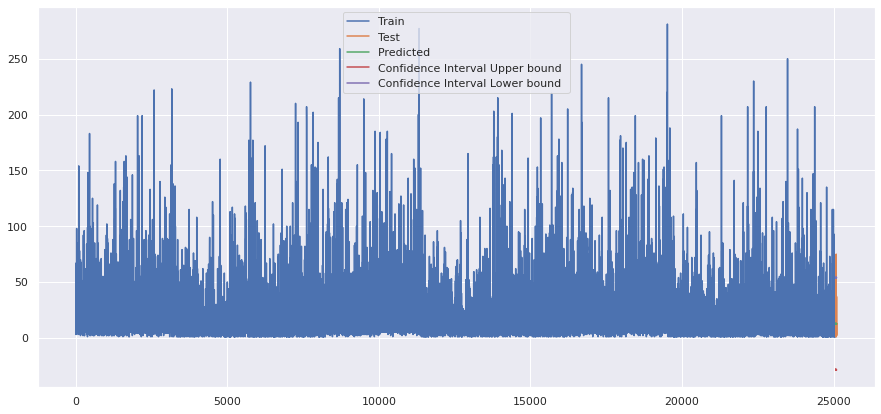

In [40]:
plt.rcParams["figure.figsize"] = [15,7]
plt.plot(trainX, label='Train ')
plt.plot(testX, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

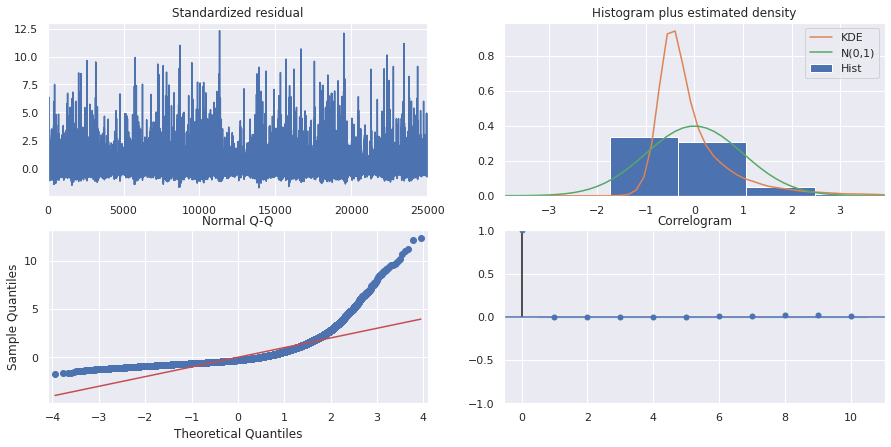

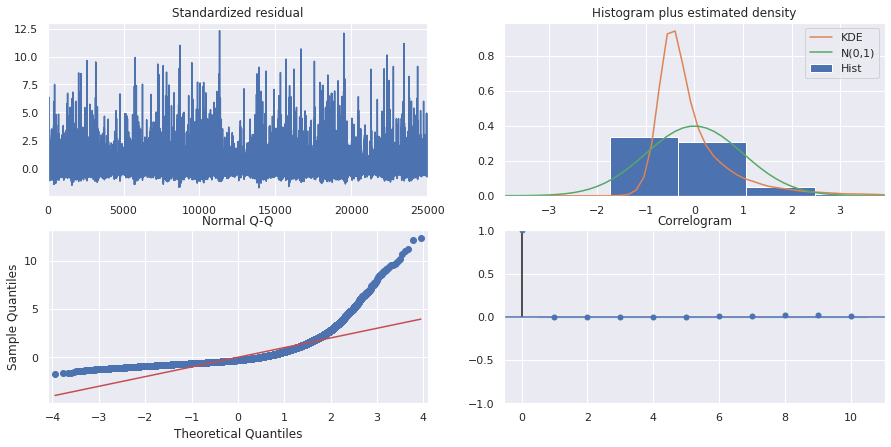

In [41]:
stepwise_model.plot_diagnostics()